In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
os.getcwd()
os.chdir('../')
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# os.chdir('../proj/regeps/regep00/')#studies/LTRC/data/epigenetic/methylation/TopMed/data/tests/rejpz/LEVEL4')
# os.chdir("../../../../proj/regeps/regep00/studies/COPDGene/analyses/rebdh/ltrc/")
os.getcwd()

'/udd/redmo'

In [2]:
noQC=pd.read_table('noQC_milipeed_analysis_15.06.2020.txt',sep='\t')
Qnorm=pd.read_table('Qnorm_milipeed_analysis_15.06.2020.txt',sep='\t')


In [32]:
np.logspace(0.1,5.5,10,base=10)

array([1.25892541e+00, 5.01187234e+00, 1.99526231e+01, 7.94328235e+01,
       3.16227766e+02, 1.25892541e+03, 5.01187234e+03, 1.99526231e+04,
       7.94328235e+04, 3.16227766e+05])

In [1]:
noQC#[np.abs(noQC.gender)<.05]

In [4]:
noQC['genderFDR']=(fdrcorrection(noQC.gender,method='negcorr')[1])
Qnorm['genderFDR']=(fdrcorrection(Qnorm.gender,method='negcorr')[1])

In [5]:
Qnorm

,Unnamed: 0,Intercept,age_baseline,gender,bmi,pre_fev1fvc,genderFDR
0,_cg09835024coeff,0.382232,-0.001181,0.038603,-0.002017,0.084169,0.743132
1,_cg09835024pvals,8.200218,-2.193022,3.320978,-2.012675,2.684274,1.000000
2,_cg14361672coeff,0.346327,0.001205,0.021034,0.001681,-0.044803,0.423569
3,_cg14361672pvals,6.129262,1.846535,1.492897,1.383477,-1.179365,1.000000
4,_cg01763666coeff,0.153616,-0.000001,-0.021109,0.002127,0.027244,-1.099349
...,...,...,...,...,...,...,...
510131,_cg13131110pvals,14.207099,0.615227,0.100815,-0.430504,0.496252,1.000000
510132,_cg24863262coeff,0.668306,-0.000300,0.007725,-0.002232,0.034389,0.181733
510133,_cg24863262pvals,16.360868,-0.635616,0.758364,-2.541084,1.253092,1.000000
510134,_cg25716013coeff,0.615206,0.000126,-0.009225,0.000050,0.012939,-0.378864


In [6]:
no_yesQC=noQC.merge(Qnorm,left_on='Unnamed: 0', right_on='Unnamed: 0')

In [31]:
NOsex=no_yesQC[np.abs(no_yesQC['genderFDR_x'])<.0005]

In [32]:
YESsex=no_yesQC[np.abs(no_yesQC['genderFDR_y'])<.005]

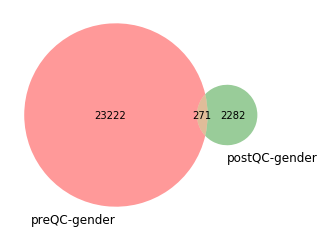

In [35]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2([set(NOsex['Unnamed: 0']),set(YESsex['Unnamed: 0'])],set_labels = ('preQC-gender', 'postQC-gender'))

plt.show()
# venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])


In [4]:
class renamer():
    def __init__(self):
        self.d = dict()
    def __call__(self, x):
        if x not in self.d:
            self.d[x] = 0
            return x
        else:
            self.d[x] += 1
            return "%s0%d" % (x, self.d[x])

append_data = pd.DataFrame()
traces= glob.glob('LTRC_sesame*')
for j,trace in enumerate(traces):
    LTRC_50=pd.read_table(trace,sep='\t',header=0, decimal='.')
    LTRC_50=pd.DataFrame(LTRC_50.values.reshape(865859,10))
    
    LTRC_50.columns=10*[trace.split('_')[2].split('.')[0]]
#     append_data=pd.concat([append_data,LTRC_50],axis=1)
    LTRC_50.to_csv('LTRC_sesame.csv', mode='a', header=False)
#     append_data=append_data.dropna(how='any') #try 'all'
# append_data.shape
# append_data=append_data.rename(columns=renamer())
# append_data = append_data.reindex(sorted(append_data.columns), axis=1)

In [ ]:
jj=append_data.dropna()
plt.hist(jj)

In [17]:
jj['361'].replace(',', '.')

,361,361,361,361,361,361,361,361,361,361
17,"0,700396167817718","0,968953395128237","0,80538797789289","0,771736456638694","0,832648619322281","0,942930572249175","0,77024779709588","0,530428479247791","0,468209882872968","0,0807764719341824"
18,"0,650905845691556","0,808677412850904","0,851718057634951","0,417930053523072","0,0700424951708292","0,0307252752787137","0,0499583393631516","0,0185847416678609","0,0632710883400769","0,0182265933089113"
19,"0,0325292852066849","0,057320070818447","0,0219118687829662","0,0276963882541081","0,0175332757186775","0,03633108223692","0,026563095121535","0,082515527675823","0,076634615568807","0,717968894936282"
23,"0,0579867432797724","0,212216435555401","0,0702710783767078","0,0452683438432964","0,0309474299278976","0,0254934486718721","0,128061179669208","0,0512562854755004","0,958988035490852","0,978620469214467"
24,"0,845214194428445","0,815801948396944","0,939005074820499","0,930762557670789","0,884383082057531","0,881212573470936","0,805658136767281","0,876609896784482","0,944172090070649","0,93480615455964"
...,...,...,...,...,...,...,...,...,...,...
865753,"0,0449931411269668","0,0396906983853764","0,115207092305607","0,023485751907631","0,0388988388042346","0,063220157542517","0,0476805264762838","0,0654921329013916","0,0209165022114651","0,0232007090127292"
865763,"0,0290259769016331","0,0319844721586766","0,028288364768231","0,044767843152808","0,0232843089090361","0,0169910064127485","0,0198910661338341","0,0199066587372483","0,0966845167489707","0,942815439507805"
865766,"0,933295798220776","0,665214012468766","0,980562905266601","0,965201642701528","0,938963702344644","0,950461145009865","0,973387574823638","0,977463841433805","0,955534725266434","0,810355436249413"
865768,"0,945828122397022","0,895748787503039","0,0447628176819206","0,0186498473268572","0,0247349450421382","0,0490955707342698","0,0353571432816535","0,0617428819856467","0,035351678314189","0,0402407389446539"


In [ ]:
meta=pd.read_csv('LTRCbigsheet.txt',sep='\t')
meta

In [13]:
pd.unique(meta.S_SUBJECTID).size

1592

In [31]:
methylation_map = pd.read_csv('netZooPy/tests/milipeed/MotifPrior_CGmap.txt', sep='\t', index_col=2,names=['source','target'])

In [ ]:
mdata=methylation_map.merge(mdata,left_index=True, right_index=True)

## tutorials for k-means on SNPs

In [73]:
# https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
# https://stackoverflow.com/questions/38372188/how-to-add-k-means-predicted-clusters-in-a-column-to-a-dataframe-in-python

In [2]:
# from sklearn.cluster import KMeans
# snps2 = pd.read_csv('LTRC_65snp.csv', sep=',')

# km = KMeans(n_clusters=5, random_state=1)
# new = snps2._get_numeric_data().dropna(axis=1)
# km.fit(new)
# predict=km.predict(new)
# snps2['kmeans'] = pd.Series(predict, index=snps2.index)

In [ ]:
# pval = pd.read_csv('detP.csv', sep='\t')
# _snps = pd.read_csv('LTRC_65snp.csv', sep=',',index_col=0)
# data=_snps._get_numeric_data().dropna(axis=1)
pheno=pd.read_csv("LTRCbigsheet.txt",sep='\t')
data.columns=pheno['Gender']
data=data.transpose()

In [84]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data._get_numeric_data().dropna(axis=1))

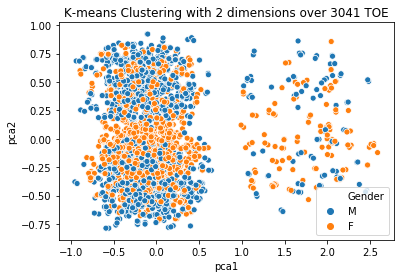

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

g=sns.scatterplot(x="pca1", y="pca2", hue=data.index, data=results)
plt.title('K-means Clustering with 2 dimensions over 3041 TOE')
# g.set(ylim=(-5, 5))
# g.set(xlim=(-5, 5))
plt.show()

In [86]:
_snps = pd.read_csv('LTRC_65snp.csv', sep=',')
data=_snps._get_numeric_data().dropna(axis=1)
# pheno=pd.read_csv("LTRCbigsheet.txt",sep='\t')
# data.columns=pheno['Gender']
# data=data.transpose()
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data._get_numeric_data().dropna(axis=1))

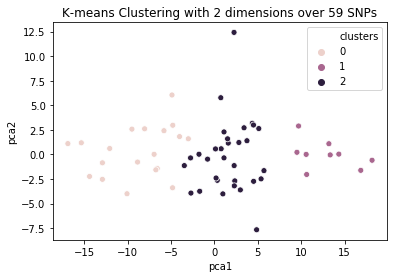

In [88]:
reduced_data = PCA(n_components=3).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions over 59 SNPs')
# g.set(ylim=(-5, 5))
# g.set(xlim=(-5, 5))
plt.show()

In [10]:
probes=pd.read_csv('detPmean.csv',sep='/t')

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [23]:
pd.DataFrame(probes[probes>.05].dropna()).to_csv('meanDetP005.txt',index=True,header=None)


In [20]:
traces=glob.glob('../../proj/regeps/regep00/studies/LTRC/data/epigenetic/methylation/TopMed/data/freezes/20200424/DCC_LEVEL3/*noob_correct.csv')
traces


[]

In [19]:
os.getcwd()
# os.chdir('../../')

'/udd/redmo'

In [31]:
traces=glob.glob('/proj/regeps/regep00/studies/LTRC/data/epigenetic/methylation/TopMed/data/freezes/20200424/DCC_LEVEL3/*noob_correct.csv')

gene_subset=[0,10000]
traces

[]

In [ ]:
append_data = pd.DataFrame()
# data=pd.DataFrame(pd.read_csv(trace,sep='\t',header=0,index_col=0))

# traces= glob.glob(data+'/*')
for i,trace in enumerate(traces):
#     for j in range(0,data.shape[0],10000):
    data=pd.DataFrame(pd.read_csv(trace,sep='\t',header=0,index_col=0))#,skiprows=j,nrows=(j+10000)-j))
    append_data=pd.concat([append_data,data],axis=1)
append_data.to_csv('noob_corrected_LEVEL3_LTRC.txt',sep='\t',index=True,header=True)

In [51]:
data=pd.read_csv('noob_corrected_LEVEL3_LTRC.txt',sep='\t',header=0,index_col=0)#,usecols=[2,10])


In [49]:
np.where(data == 0)

(array([], dtype=int64), array([], dtype=int64))

# Sex mismatches

In [7]:
data=pd.read_csv('data/MotifPipeline/remap/A549_spRE2020.txt',sep='\t',header=None,index_col=None)

In [39]:
data=pd.read_csv('LTRC_sex_ls_2.txt',sep='\t',header=0,index_col=None)
Pdata=pd.read_csv('LTRC_predicted_sex_ls.txt',sep='\t',header=0,index_col=None)

In [48]:
cc=Pdata['predictedSex']
dd=data['sex']
data=pd.concat([cc,dd],axis=1)
data

,predictedSex,sex
0,M,M
1,F,F
2,F,F
3,F,F
4,M,M
...,...,...
3036,F,F
3037,F,F
3038,F,F
3039,F,F


In [49]:
Pdata[data['predictedSex']!=data['sex']]

,TOE,xMed,yMed,predictedSex
366,TOE550733_203299670081_R05C01_329694,14.000406,12.234903,M
2057,TOE596207_203219760032_R04C01_325248,13.667385,12.219421,M
2665,TOE428406_203991470121_R07C01_367763,13.775731,8.694199,F
2907,TOE802043_203866380049_R05C01_367756,13.299029,12.231773,M


# cononcical LTRC pheno

In [272]:
pheno=pd.read_table('analyses/LTRC/ltrcSamplePhenoIdMap_20201019.csv',sep=',')

# pheno=pheno[pheno['Project']!='WGS']
# pheno=pheno[pheno['Project']!='RNASeq']
pheno=pheno[['patid','topmedId','Project']]
pheno.drop_duplicates(inplace=True)
count=pheno.groupby([pheno.patid,pheno.Project],as_index=False).size()

pheno[pheno['patid']==407789]

,patid,topmedId,Project
7715,407789,TOE134594,Methylation.lung
7716,407789,TOR273324,RNASeq
7717,407789,TOR202431,RNASeq
7718,407789,TOE191601,Methylation.lung
7719,407789,TOE246729,Methylation.lung
7720,407789,TOE462266,Methylation.lung
7721,407789,TOE576224,Methylation.lung
7722,407789,NWD399581,WGS


In [274]:
count[count['patid']==407789]

,patid,Project,size
5215,407789,Methylation.lung,5
5216,407789,RNASeq,2
5217,407789,WGS,1


In [262]:
[[len(count[(count['size']==1) & (count['Project']=="Methylation.blood")]),
len(count[(count['size']==1) & (count['Project']=="Methylation.lung")]),
len(count[(count['size']==1) & (count['Project']=="RNASeq")]),
len(count[(count['size']==1) & (count['Project']=="WGS")])]
 ,
 [len(count[(count['size']==2) & (count['Project']=="Methylation.blood")]),
len(count[(count['size']==2) & (count['Project']=="Methylation.lung")]),
len(count[(count['size']==2) & (count['Project']=="RNASeq")]),
len(count[(count['size']==2) & (count['Project']=="WGS")])]
 ,
 [len(count[(count['size']==3) & (count['Project']=="Methylation.blood")]),
len(count[(count['size']==3) & (count['Project']=="Methylation.lung")]),
len(count[(count['size']==3) & (count['Project']=="RNASeq")]),
len(count[(count['size']==3) & (count['Project']=="WGS")])]
 ,
 [len(count[(count['size']==4) & (count['Project']=="Methylation.blood")]),
len(count[(count['size']==4) & (count['Project']=="Methylation.lung")]),
len(count[(count['size']==4) & (count['Project']=="RNASeq")]),
len(count[(count['size']==4) & (count['Project']=="WGS")])]
 ,
 
 [len(count[(count['size']==5) & (count['Project']=="Methylation.blood")]),
len(count[(count['size']==5) & (count['Project']=="Methylation.lung")]),
len(count[(count['size']==5) & (count['Project']=="RNASeq")]),
len(count[(count['size']==5) & (count['Project']=="WGS")])]]
 

[[1316, 1432, 1470, 1500],
 [30, 103, 65, 90],
 [0, 60, 13, 2],
 [0, 5, 0, 0],
 [0, 1, 0, 0]]

<AxesSubplot:xlabel='size', ylabel='Count'>

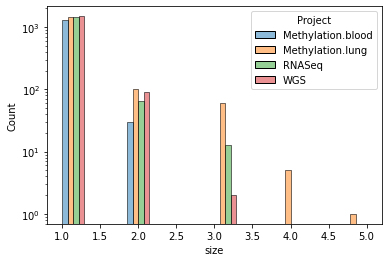

In [175]:
z=sns.histplot(data=count, x="size", hue="Project",alpha=0.5,multiple="dodge",log_scale=(False,True))

# cononcical LTRC pheno + meta

In [263]:
pheno=pd.read_table('analyses/LTRC/ltrcSamplePhenoIdMap_20201019.csv',sep=',')
# meta_gr = meta.groupby(['patid','age']).agg({'lobe':'mean'})
pheno_agr = pheno.groupby(['patid']).agg(' '.join)
pd.DataFrame(pheno_agr)
methyl_pheno=pheno[pheno['topmedId'].str.contains(pat='TOE')]
# methyl_pheno
# /proj/regeps/regep00/studies/LTRC/data/epigenetic/methylation/TopMed/data/freezes/20200424/
# data_head=pd.read_table('analyses/LTRC/beta_LTRC_header.txt',sep='\t')
data_head=pd.read_table('data/LTRC/LTRC_map4.csv',sep='\t')
# data_head=pd.read_table('resiqBeta3.txt',sep='\t')


TOE=data_head.columns.str.split('_').str[0].tolist()
TOE=pd.DataFrame(TOE)
TOE['TOE']=TOE[0]

In [264]:
# plt.hist(pd.unique(methyl_pheno_sub_lung.patid),bins=100,log=True,label='lung')
# plt.hist(pd.unique(methyl_pheno_sub_blood.patid),bins=100,log=True,label='blood')
# plt.legend(loc="best")
# plt.xlabel("patid")

In [265]:
meta=pd.read_table('analyses/LTRC/ltrcLongTopMedHarm_20201019.csv',sep=',')


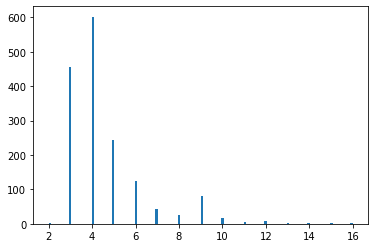

In [266]:
all_methyl_pheno=pheno.merge(meta,right_on='patid',left_on='patid')
# all_methyl_pheno
count=all_methyl_pheno.groupby(all_methyl_pheno.patid,as_index=False).size()
# wsf=plt.hist(count['size'],bins=120)

count2=meta.groupby(meta.patid,as_index=False).size()
wsf=plt.hist(count2['size'],bins=120)

<AxesSubplot:xlabel='wt_kg', ylabel='Count'>

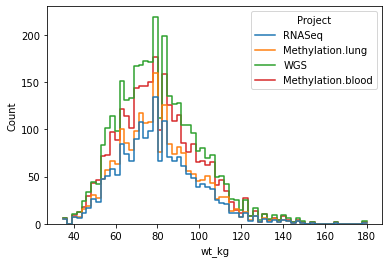

In [206]:
Blood=all_methyl_pheno[all_methyl_pheno['Project']=='Methylation.blood']
Lung=all_methyl_pheno[all_methyl_pheno['Project']=='Methylation.lung']
# tmpa=plt.hist(Blood.wt_kg,bins=100)
# tmpb=plt.hist(Lung.wt_kg,bins=100)
sns.histplot(data=all_methyl_pheno, x="wt_kg", hue="Project",element="step", fill=False)#,log_scale=(False,True))
# sns.histplot(data=all_methyl_pheno[all_methyl_pheno['Project']=='Methylation.lung'], x="wt_kg", hue="Project",alpha=0.5,multiple="stack")#,log_scale=(False,True))

<AxesSubplot:xlabel='post_fet', ylabel='Count'>

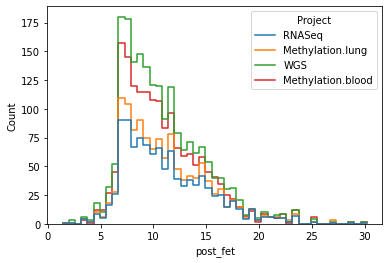

In [207]:
sns.histplot(data=all_methyl_pheno, x="post_fet", hue="Project",element="step", fill=False)

# subject phenotypes

In [48]:
methyl_pheno_sub=methyl_pheno.merge(TOE,right_on='TOE',left_on='topmedId')
# meta_gr = meta.groupby(['patid','age']).agg({'lobe':'mean'})
meta_gr = meta.groupby(['patid','age','lobe']).agg(' '.join)
pd.DataFrame(meta_gr)
# meta.columns

,,,date,date.age,cp2primdx,lobarPrimDx
patid,age,lobe,,,,
11059,66,R_Upper,2017-03-22,2017-03-22,"Emphysema, centrilobular",Emphysema - centrilobular
11061,78,L_Upper,2017-04-11,2017-04-11,"Emphysema, centrilobular",Emphysema - centrilobular
11062,64,L_Lower,2017-04-24,2017-04-24,Normal,Normal
11063,68,L_Lower,2017-05-12,2017-05-12,Granulomatous Inflammation (NOS),Granulomatous inflammation (NOS)
11066,71,L_Ling,2017-08-21,2017-08-21,"Emphysema, centrilobular",Emphysema - centrilobular
...,...,...,...,...,...,...
803493,69,L_Upper,2014-07-25,2014-07-25,Honeycomb Lung,Usual interstitial pneumonia (UIP)
803503,60,L_Upper,2014-08-05,2014-08-05,"Emphysema, centrilobular",Emphysema - centrilobular
803520,75,R_Upper,2014-09-02,2014-09-02,"Emphysema, centrilobular",Emphysema - centrilobular


In [8]:
all_methyl_pheno=methyl_pheno_sub.merge(meta,right_on='patid',left_on='patid')

In [9]:
methyl_pheno_sub_lung=all_methyl_pheno[all_methyl_pheno['Project'].str.contains(pat='Methylation.lung')]
methyl_pheno_sub_lung_case=methyl_pheno_sub_lung[methyl_pheno_sub_lung['clinCopd']==1]
MLCaseMale=methyl_pheno_sub_lung_case[methyl_pheno_sub_lung_case['gender']==1]
MLCaseFemale=methyl_pheno_sub_lung_case[methyl_pheno_sub_lung_case['gender']==0]

methyl_pheno_sub_lung_control=methyl_pheno_sub_lung[methyl_pheno_sub_lung['clinCopd']==0]
MLContMale=methyl_pheno_sub_lung_control[methyl_pheno_sub_lung_control['gender']==1]
MLContFemale=methyl_pheno_sub_lung_control[methyl_pheno_sub_lung_control['gender']==0]

LM=pd.unique(methyl_pheno_sub_lung.topmedId)
LCaM=pd.unique(MLCaseMale.topmedId) ## more PatID than topmedID!!
LCoM=pd.unique(MLContMale.topmedId)
LCaF=pd.unique(MLCaseFemale.topmedId)
LCoF=pd.unique(MLContFemale.topmedId)

[len(LM),len(LCaM),len(LCoM),len(LCaF),len(LCoF)]


[1762, 349, 604, 271, 544]

In [10]:
methyl_pheno_sub_blood=all_methyl_pheno[all_methyl_pheno['Project'].str.contains(pat='Methylation.blood')]
methyl_pheno_sub_blood_case=methyl_pheno_sub_blood[methyl_pheno_sub_blood['clinCopd']==1]
MBCaseMale=methyl_pheno_sub_blood_case[methyl_pheno_sub_blood_case['gender']==1]
MBCaseFemale=methyl_pheno_sub_blood_case[methyl_pheno_sub_blood_case['gender']==0]

methyl_pheno_sub_blood_control=methyl_pheno_sub_blood[methyl_pheno_sub_blood['clinCopd']==0]
MBContMale=methyl_pheno_sub_blood_control[methyl_pheno_sub_blood_control['gender']==1]
MBContFemale=methyl_pheno_sub_blood_control[methyl_pheno_sub_blood_control['gender']==0]

BM=pd.unique(methyl_pheno_sub_blood.topmedId)
BCaM=pd.unique(MBCaseMale.topmedId)
BCoM=pd.unique(MBContMale.topmedId)
BCaF=pd.unique(MBCaseFemale.topmedId)
BCoF=pd.unique(MBContFemale.topmedId)

[len(BM),len(BCaM),len(BCoM),len(BCaF),len(BCoF)]



[1279, 180, 489, 179, 432]

In [11]:
# data_head=pd.read_table('analyses/LTRC/beta_LTRC_header.txt',sep='\t')
# TOE=data_head.columns.str.split('_').str[0].tolist()
# TOE=pd.DataFrame(TOE)
# TOE['TOE']=TOE[0]

TOE['index']=TOE.index
TOE.index=TOE['TOE']
TOE=TOE.T

BMi=TOE[BM].T['index'].values.astype(int)
BCaMi=TOE[BCaM].T['index'].values.astype(int)
BCoMi=TOE[BCoM].T['index'].values.astype(int)
BCaFi=TOE[BCaF].T['index'].values.astype(int)
BCoFi=TOE[BCoF].T['index'].values.astype(int)

LMi=TOE[LM].T['index'].values.astype(int)
LCaMi=TOE[LCaM].T['index'].values.astype(int)
LCoMi=TOE[LCoM].T['index'].values.astype(int)
LCaFi=TOE[LCaF].T['index'].values.astype(int)
LCoFi=TOE[LCoF].T['index'].values.astype(int)


In [16]:
# cc=pd.DataFrame([BMi,BCaMi,BCoMi,BCaFi,BCoFi,LMi,LCaMi,LCoMi,LCaFi,LCoFi])
# cc.index=['BMi','BCaMi','BCoMi','BCaFi','BCoFi','LMi','LCaMi','LCoMi','LCaFi','LCoFi']
# cc.to_csv('analyses/LTRC/lbk_pheno_index_halloween.txt',sep='\t',index=True,header=False)

dd=pd.DataFrame([BMi])
dd.index=['BMi']
dd.to_csv('analyses/LTRC/lbk_pheno_index_bidenA.txt',sep='\t',index=True,header=False)

ee=pd.DataFrame([LMi])
ee.index=['LMi']
ee.to_csv('analyses/LTRC/lbk_pheno_index_bidenB.txt',sep='\t',index=True,header=False)


# parse into gender and disease status subpop

In [13]:
ind=pd.read_csv('~/analyses/LTRC/lbk_pheno_index_halloween.txt',sep='\t',index_col=0,header=None)

a=ind.T['BMi'].dropna()
data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_BMi.txt',sep='\t',index=False,header=True)

# a=ind.T['BCaMi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_BCaMi.txt',sep='\t',index=False,header=True)

# a=ind.T['BCoMi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_BCoMi.txt',sep='\t',index=False,header=True)

# a=ind.T['BCaFi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_BCaFi.txt',sep='\t',index=False,header=True)

# a=ind.T['BCoFi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_BCoFi.txt',sep='\t',index=False,header=True)

a=ind.T['LMi'].dropna()
data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_LMi.txt',sep='\t',index=False,header=True)

# a=ind.T['LCaMi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_LCaMi.txt',sep='\t',index=False,header=True)

# a=ind.T['LCoMi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_LCoMi.txt',sep='\t',index=False,header=True)

# a=ind.T['LCaFi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_LCaFi.txt',sep='\t',index=False,header=True)

# a=ind.T['LCoFi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_LCoFi.txt',sep='\t',index=False,header=True)




In [34]:
TOE.T[TOE.T['TOE']=='TOE550733']
# TOE428406,TOE802043,TOE550733,TOE596207

,0,TOE,index
TOE,,,
TOE550733,TOE550733,TOE550733,366


# diff of avg btwn subpop

In [5]:
cg=pd.read_csv('data/LTRC/LTRC_cg.txt',sep='\t',header=0,index_col=None)

BCaMi=pd.read_csv('data/LTRC/Beta_flagged_BCaMi.txt',sep='\t',header=0,index_col=None)
BCoMi=pd.read_csv('data/LTRC/Beta_flagged_BCoMi.txt',sep='\t',header=0,index_col=None)
#BM=
(BCaMi.mean(axis=1)-BCoMi.mean(axis=1)).to_csv('data/LTRC/BM_BCaMi-BCoMi.txt',sep='\t',index=False,header=True)
 
BCaFi=pd.read_csv('data/LTRC/Beta_flagged_BCaFi.txt',sep='\t',header=0,index_col=None)
# BD=
(BCaMi.mean(axis=1)-BCaFi.mean(axis=1)).to_csv('data/LTRC/BD_BCaMi-BCaFi.txt',sep='\t',index=False,header=True)

BCoFi=pd.read_csv('data/LTRC/Beta_flagged_BCoFi.txt',sep='\t',header=0,index_col=None)
# BND=
(BCoMi.mean(axis=1)-BCoFi.mean(axis=1)).to_csv('data/LTRC/BND_BCoMi-BCoFi.txt',sep='\t',index=False,header=True)
# BF=
(BCaFi.mean(axis=1)-BCoFi.mean(axis=1)).to_csv('data/LTRC/BF_BCaFi-BCoFi.txt',sep='\t',index=False,header=True)


LCaMi=pd.read_csv('data/LTRC/Beta_flagged_LCaMi.txt',sep='\t',header=0,index_col=None)
LCoMi=pd.read_csv('data/LTRC/Beta_flagged_LCoMi.txt',sep='\t',header=0,index_col=None)
#LM=
(LCaMi.mean(axis=1)-LCoMi.mean(axis=1)).to_csv('data/LTRC/LM_LCaMi-LCoMi.txt',sep='\t',index=False,header=True)
 
LCaFi=pd.read_csv('data/LTRC/Beta_flagged_LCaFi.txt',sep='\t',header=0,index_col=None)
# LD=
(LCaMi.mean(axis=1)-LCaFi.mean(axis=1)).to_csv('analyses/LTRC/LD_LCaMi-LCaFi.txt',sep='\t',index=False,header=True)

LCoFi=pd.read_csv('data/LTRC/Beta_flagged_LCoFi.txt',sep='\t',header=0,index_col=None)
# LND=
(LCoMi.mean(axis=1)-LCoFi.mean(axis=1)).to_csv('data/LTRC/LND_LCoMi-LCoFi.txt',sep='\t',index=False,header=True)
# LF=
(LCaFi.mean(axis=1)-LCoFi.mean(axis=1)).to_csv('data/LTRC/LF_LCaFi-LCoFi.txt',sep='\t',index=False,header=True)


# Sex

Text(0.5, 1.0, 'Diff of Avg between Disease Status')

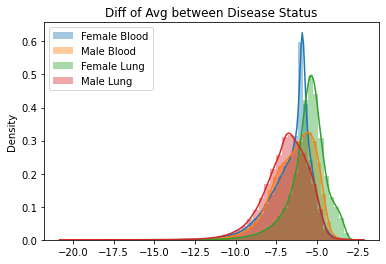

In [6]:
cg=pd.read_csv('data/LTRC/LTRC_cg.txt',sep='\t',header=0,index_col=None)
BF=pd.read_csv('data/LTRC/BF_BCaFi-BCoFi.txt',sep='\t',header=0,index_col=None)
BM=pd.read_csv('data/LTRC/BM_BCaMi-BCoMi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(BF.values),kde=True,hist=True,rug=False,label='Female Blood')
b=sns.distplot(np.log(BM.values),kde=True,hist=True,rug=False,label='Male Blood')

LF=pd.read_csv('data/LTRC/LF_LCaFi-LCoFi.txt',sep='\t',header=0,index_col=None)
LM=pd.read_csv('data/LTRC/LM_LCaMi-LCoMi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(LF.values),kde=True,hist=True,rug=False,label='Female Lung')
b=sns.distplot(np.log(LM.values),kde=True,hist=True,rug=False,label='Male Lung')
plt.legend(loc='best')
# plt.xlabel('Log Diff')
plt.title('Diff of Avg between Disease Status')

# Disease

Text(0.5, 1.0, 'Diff of Avg between Sex')

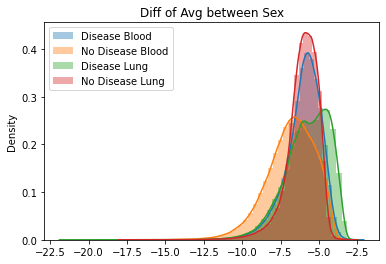

In [7]:
# cg=pd.read_csv('data/LTRC/LTRC_cg.txt',sep='\t',header=0,index_col=None)
BD=pd.read_csv('data/LTRC/BD_BCaMi-BCaFi.txt',sep='\t',header=0,index_col=None)
BND=pd.read_csv('data/LTRC/BND_BCoMi-BCoFi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(BD.values),kde=True,hist=True,rug=False,label='Disease Blood')
b=sns.distplot(np.log(BND.values),kde=True,hist=True,rug=False,label='No Disease Blood')

LD=pd.read_csv('data/LTRC/LD_LCaMi-LCaFi.txt',sep='\t',header=0,index_col=None)
LND=pd.read_csv('data/LTRC/LND_LCoMi-LCoFi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(LD.values),kde=True,hist=True,rug=False,label='Disease Lung')
b=sns.distplot(np.log(LND.values),kde=True,hist=True,rug=False,label='No Disease Lung')
plt.legend(loc='best')
# plt.xlabel('Log Diff')
plt.title('Diff of Avg between Sex')

# lung and blood seperately after funnorm

In [251]:
# data_head=pd.read_table('data/LTRC/LTRC_map4.csv',sep='\t')
data_head_lung=pd.read_table('data/LTRC/lung_head.txt',sep='\t')
data_head_blood=pd.read_table('data/LTRC/blood_head.txt',sep='\t')

# data_head=pd.read_table('resiqBeta3.txt',sep='\t')


TOEL=data_head_lung.columns.str.split('_').str[0].tolist()
TOEL=pd.DataFrame(TOEL)
TOEL['TOE']=TOEL[0]

TOEB=data_head_blood.columns.str.split('_').str[0].tolist()
TOEB=pd.DataFrame(TOEB)
TOEB['TOE']=TOEB[0]

In [212]:
lung_methyl_pheno_sub=methyl_pheno.merge(TOEL,right_on='TOE',left_on='topmedId')
lung_methyl_pheno=lung_methyl_pheno_sub.merge(meta,right_on='patid',left_on='patid')

blood_methyl_pheno_sub=methyl_pheno.merge(TOEB,right_on='TOE',left_on='topmedId')
blood_methyl_pheno=blood_methyl_pheno_sub.merge(meta,right_on='patid',left_on='patid')

In [240]:
# methyl_pheno_sub_lung=lung_methyl_pheno[lung_methyl_pheno['Project'].str.contains(pat='Methylation.lung')]
methyl_pheno_sub_lung_case=lung_methyl_pheno[lung_methyl_pheno['clinCopd']==1]
MLCaseMale=methyl_pheno_sub_lung_case[methyl_pheno_sub_lung_case['gender']==1]
MLCaseFemale=methyl_pheno_sub_lung_case[methyl_pheno_sub_lung_case['gender']==0]

methyl_pheno_sub_lung_control=lung_methyl_pheno[lung_methyl_pheno['clinCopd']==0]
MLContMale=methyl_pheno_sub_lung_control[methyl_pheno_sub_lung_control['gender']==1]
MLContFemale=methyl_pheno_sub_lung_control[methyl_pheno_sub_lung_control['gender']==0]

# LM=pd.unique(methyl_pheno_sub_lung.topmedId)
LCaM=pd.unique(MLCaseMale.topmedId) ## more PatID than topmedID!!
LCoM=pd.unique(MLContMale.topmedId)
LCaF=pd.unique(MLCaseFemale.topmedId)
LCoF=pd.unique(MLContFemale.topmedId)

[len(LM),len(LCaM),len(LCoM),len(LCaF),len(LCoF)]


[1762, 313, 618, 264, 566]

In [241]:
# methyl_pheno_sub_blood=all_methyl_pheno[all_methyl_pheno['Project'].str.contains(pat='Methylation.blood')]
methyl_pheno_sub_blood_case=blood_methyl_pheno[blood_methyl_pheno['clinCopd']==1]
MBCaseMale=methyl_pheno_sub_blood_case[methyl_pheno_sub_blood_case['gender']==1]
MBCaseFemale=methyl_pheno_sub_blood_case[methyl_pheno_sub_blood_case['gender']==0]

methyl_pheno_sub_blood_control=blood_methyl_pheno[blood_methyl_pheno['clinCopd']==0]
MBContMale=methyl_pheno_sub_blood_control[methyl_pheno_sub_blood_control['gender']==1]
MBContFemale=methyl_pheno_sub_blood_control[methyl_pheno_sub_blood_control['gender']==0]

# BM=pd.unique(methyl_pheno_sub_blood.topmedId)
BCaM=pd.unique(MBCaseMale.topmedId)
BCoM=pd.unique(MBContMale.topmedId)
BCaF=pd.unique(MBCaseFemale.topmedId)
BCoF=pd.unique(MBContFemale.topmedId)

[len(BM),len(BCaM),len(BCoM),len(BCaF),len(BCoF)]



[1279, 215, 472, 186, 409]

In [252]:
# data_head=pd.read_table('analyses/LTRC/beta_LTRC_header.txt',sep='\t')
# TOE=data_head.columns.str.split('_').str[0].tolist()
# TOE=pd.DataFrame(TOE)
# TOE['TOE']=TOE[0]

TOEL['index2']=TOEL.index
TOEL.index=TOEL['TOE']
TOEL=TOEL.T

# LMi=TOEL[LM].T['index'].values.astype(int)
LCaMi=TOEL[LCaM].T['index2'].values.astype(int)
LCoMi=TOEL[LCoM].T['index2'].values.astype(int)
LCaFi=TOEL[LCaF].T['index2'].values.astype(int)
LCoFi=TOEL[LCoF].T['index2'].values.astype(int)

TOEB['index2']=TOEB.index
TOEB.index=TOEB['TOE']
TOEB=TOEB.T


# BMi=TOEB[BM].T['index'].values.astype(int)
BCaMi=TOEB[BCaM].T['index2'].values.astype(int)
BCoMi=TOEB[BCoM].T['index2'].values.astype(int)
BCaFi=TOEB[BCaF].T['index2'].values.astype(int)
BCoFi=TOEB[BCoF].T['index2'].values.astype(int)



cc=pd.DataFrame([BMi,BCaMi,BCoMi,BCaFi,BCoFi])
cc.index=['BMi','BCaMi','BCoMi','BCaFi','BCoFi']
cc.to_csv('analyses/LTRC/lbk_pheno_index_etna_blood.txt',sep='\t',index=True,header=False)

dd=pd.DataFrame([LMi,LCaMi,LCoMi,LCaFi,LCoFi])
dd.index=['LMi','LCaMi','LCoMi','LCaFi','LCoFi']
dd.to_csv('analyses/LTRC/lbk_pheno_index_etna_lung.txt',sep='\t',index=True,header=False)

In [253]:
blood_ind=pd.read_csv('~/analyses/LTRC/lbk_pheno_index_etna_blood.txt',sep='\t',index_col=0,header=None)

# a=ind.T['BMi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_BMi.txt',sep='\t',index=False,header=True)

a=blood_ind.T['BCaMi'].dropna()
data=pd.read_csv('data/LTRC/bLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_BCaMi.txt',sep='\t',index=False,header=True)

a=blood_ind.T['BCoMi'].dropna()
data=pd.read_csv('data/LTRC/bLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_BCoMi.txt',sep='\t',index=False,header=True)

a=blood_ind.T['BCaFi'].dropna()
data=pd.read_csv('data/LTRC/bLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_BCaFi.txt',sep='\t',index=False,header=True)

a=blood_ind.T['BCoFi'].dropna()
data=pd.read_csv('data/LTRC/bLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_BCoFi.txt',sep='\t',index=False,header=True)

lung_ind=pd.read_csv('~/analyses/LTRC/lbk_pheno_index_etna_lung.txt',sep='\t',index_col=0,header=None)

# a=ind.T['LMi'].dropna()
# data=pd.read_csv('data/LTRC/Beta_flagged.csv',sep='\t',header=0,index_col=None,usecols=a.astype(int))
# data.to_csv('data/LTRC/Beta_flagged_LMi.txt',sep='\t',index=False,header=True)

a=lung_ind.T['LCaMi'].dropna()
data=pd.read_csv('data/LTRC/lLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_LCaMi.txt',sep='\t',index=False,header=True)

a=lung_ind.T['LCoMi'].dropna()
data=pd.read_csv('data/LTRC/lLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_LCoMi.txt',sep='\t',index=False,header=True)

a=lung_ind.T['LCaFi'].dropna()
data=pd.read_csv('data/LTRC/lLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_LCaFi.txt',sep='\t',index=False,header=True)

a=lung_ind.T['LCoFi'].dropna()
data=pd.read_csv('data/LTRC/lLTRC_b_funnorm_lbk.txt',sep='\t',header=0,index_col=None,usecols=a.astype(int))
data.to_csv('data/LTRC/Beta_flagged_LCoFi.txt',sep='\t',index=False,header=True)




In [277]:
cg=pd.read_csv('data/LTRC/LTRC_cg.txt',sep='\t',header=0,index_col=None)

BCaMi=pd.read_csv('data/LTRC/Beta_flagged_BCaMi.txt',sep='\t',header=0,index_col=None)
BCoMi=pd.read_csv('data/LTRC/Beta_flagged_BCoMi.txt',sep='\t',header=0,index_col=None)
#BM=
# (BCaMi.mean(axis=1)-BCoMi.mean(axis=1)).to_csv('data/LTRC/BM_BCaMi-BCoMi.txt',sep='\t',index=False,header=True)
 
BCaFi=pd.read_csv('data/LTRC/Beta_flagged_BCaFi.txt',sep='\t',header=0,index_col=None)
# BD=
# (BCaMi.mean(axis=1)-BCaFi.mean(axis=1)).to_csv('data/LTRC/BD_BCaMi-BCaFi.txt',sep='\t',index=False,header=True)

BCoFi=pd.read_csv('data/LTRC/Beta_flagged_BCoFi.txt',sep='\t',header=0,index_col=None)
# BND=
# (BCoMi.mean(axis=1)-BCoFi.mean(axis=1)).to_csv('data/LTRC/BND_BCoMi-BCoFi.txt',sep='\t',index=False,header=True)
# # BF=
# (BCaFi.mean(axis=1)-BCoFi.mean(axis=1)).to_csv('data/LTRC/BF_BCaFi-BCoFi.txt',sep='\t',index=False,header=True)


LCaMi=pd.read_csv('data/LTRC/Beta_flagged_LCaMi.txt',sep='\t',header=0,index_col=None)
LCoMi=pd.read_csv('data/LTRC/Beta_flagged_LCoMi.txt',sep='\t',header=0,index_col=None)
#LM=
# (LCaMi.mean(axis=1)-LCoMi.mean(axis=1)).to_csv('data/LTRC/LM_LCaMi-LCoMi.txt',sep='\t',index=False,header=True)
 
LCaFi=pd.read_csv('data/LTRC/Beta_flagged_LCaFi.txt',sep='\t',header=0,index_col=None)
# LD=
# (LCaMi.mean(axis=1)-LCaFi.mean(axis=1)).to_csv('analyses/LTRC/LD_LCaMi-LCaFi.txt',sep='\t',index=False,header=True)

LCoFi=pd.read_csv('data/LTRC/Beta_flagged_LCoFi.txt',sep='\t',header=0,index_col=None)
# LND=
# (LCoMi.mean(axis=1)-LCoFi.mean(axis=1)).to_csv('data/LTRC/LND_LCoMi-LCoFi.txt',sep='\t',index=False,header=True)
# # LF=
# (LCaFi.mean(axis=1)-LCoFi.mean(axis=1)).to_csv('data/LTRC/LF_LCaFi-LCoFi.txt',sep='\t',index=False,header=True)


In [280]:
[[BCaMi.shape[1],BCoMi.shape[1],BCaFi.shape[1],BCoFi.shape[1]],
[LCaMi.shape[1],LCoMi.shape[1],LCaFi.shape[1],LCoFi.shape[1]]]

[[215, 472, 186, 409], [313, 618, 264, 566]]

Text(0.5, 1.0, 'Diff of Avg between Disease Status')

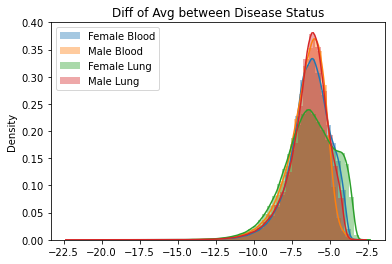

In [257]:
cg=pd.read_csv('data/LTRC/LTRC_cg.txt',sep='\t',header=0,index_col=None)
BF=pd.read_csv('data/LTRC/BF_BCaFi-BCoFi.txt',sep='\t',header=0,index_col=None)
BM=pd.read_csv('data/LTRC/BM_BCaMi-BCoMi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(BF.values),kde=True,hist=True,rug=False,label='Female Blood')
b=sns.distplot(np.log(BM.values),kde=True,hist=True,rug=False,label='Male Blood')

LF=pd.read_csv('data/LTRC/LF_LCaFi-LCoFi.txt',sep='\t',header=0,index_col=None)
LM=pd.read_csv('data/LTRC/LM_LCaMi-LCoMi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(LF.values),kde=True,hist=True,rug=False,label='Female Lung')
b=sns.distplot(np.log(LM.values),kde=True,hist=True,rug=False,label='Male Lung')
plt.legend(loc='best')
# plt.xlabel('Log Diff')
plt.title('Diff of Avg between Disease Status')

Text(0.5, 1.0, 'Diff of Avg between Sex')

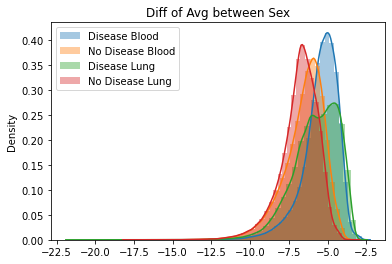

In [258]:
# cg=pd.read_csv('data/LTRC/LTRC_cg.txt',sep='\t',header=0,index_col=None)
BD=pd.read_csv('data/LTRC/BD_BCaMi-BCaFi.txt',sep='\t',header=0,index_col=None)
BND=pd.read_csv('data/LTRC/BND_BCoMi-BCoFi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(BD.values),kde=True,hist=True,rug=False,label='Disease Blood')
b=sns.distplot(np.log(BND.values),kde=True,hist=True,rug=False,label='No Disease Blood')

LD=pd.read_csv('data/LTRC/LD_LCaMi-LCaFi.txt',sep='\t',header=0,index_col=None)
LND=pd.read_csv('data/LTRC/LND_LCoMi-LCoFi.txt',sep='\t',header=0,index_col=None)
g=sns.distplot(np.log(LD.values),kde=True,hist=True,rug=False,label='Disease Lung')
b=sns.distplot(np.log(LND.values),kde=True,hist=True,rug=False,label='No Disease Lung')
plt.legend(loc='best')
# plt.xlabel('Log Diff')
plt.title('Diff of Avg between Sex')